<div style="
    padding: 20px;
    color: white;
    margin: 0;
    font-size: 300%;
    font-weight: 800;
    text-align: center;
    display: fill;
    border-radius: 60px;
    background-color: #D8D8D8;
    box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);
    text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);
">
    Geophone Sensor <br>
    (EDA / Machine learning)
</div>

# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Import Libraries & Read Dataset</div>

In [10]:
# For EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder 
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression, BayesianRidge
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.exceptions import FitFailedWarning

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [11]:
df = pd.read_csv('/kaggle/input/geophone-sensor-dataset/geophone-sensor-data.csv')
df.head(5)

,timestamp,mean,top_3_mean,min,max,std_dev,median,q1,q3,skewness,dominant_freq,energy,activity,name
0,01:51:43,2046.726000,2057.666667,2035,2060,3.452186,2047.0,2043.0,2049.0,-0.152574,601.0,1.988682e+09,walking,Yusuf
1,01:51:46,2046.619333,2053.000000,2040,2053,3.580469,2047.0,2044.0,2050.0,-0.150615,300.0,1.988028e+09,walking,Yusuf
2,01:51:50,2046.598000,2056.000000,2030,2059,3.592826,2047.0,2044.0,2049.0,-0.370125,300.0,1.987897e+09,walking,Yusuf
3,01:51:53,2046.560000,2054.000000,2039,2055,3.414830,2047.0,2044.0,2049.0,-0.321296,300.0,1.987662e+09,walking,Yusuf
4,01:51:56,2046.656667,2055.000000,2034,2057,3.356802,2048.0,2044.0,2049.0,-0.379134,300.0,1.988255e+09,walking,Yusuf


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   timestamp      1800 non-null   object 
 1   mean           1800 non-null   float64
 2   top_3_mean     1800 non-null   float64
 3   min            1800 non-null   int64  
 4   max            1800 non-null   int64  
 5   std_dev        1800 non-null   float64
 6   median         1800 non-null   float64
 7   q1             1800 non-null   float64
 8   q3             1800 non-null   float64
 9   skewness       1800 non-null   float64
 10  dominant_freq  1800 non-null   float64
 11  energy         1800 non-null   float64
 12  activity       1800 non-null   object 
 13  name           1800 non-null   object 
dtypes: float64(9), int64(2), object(3)
memory usage: 197.0+ KB


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean,1800.0,2.042247e+03,3.659114e+00,2.034811e+03,2.039495e+03,2.041287e+03,2.045836e+03,2.050709e+03
top_3_mean,1800.0,2.064690e+03,2.829362e+01,2.039000e+03,2.047333e+03,2.052333e+03,2.065333e+03,2.232667e+03
min,1800.0,2.016367e+03,2.813426e+01,1.948000e+03,2.012000e+03,2.031000e+03,2.035000e+03,2.045000e+03
max,1800.0,2.067156e+03,3.180050e+01,2.039000e+03,2.048000e+03,2.053000e+03,2.070000e+03,2.261000e+03
std_dev,1800.0,8.528827e+00,1.076064e+01,1.374898e+00,2.710610e+00,3.455542e+00,4.707158e+00,3.767896e+01
median,1800.0,2.043396e+03,5.044266e+00,2.034000e+03,2.040000e+03,2.041000e+03,2.048000e+03,2.056000e+03
q1,1800.0,2.037628e+03,4.490098e+00,2.021000e+03,2.035000e+03,2.037000e+03,2.040000e+03,2.049000e+03
q3,1800.0,2.048030e+03,9.018572e+00,2.037000e+03,2.042000e+03,2.044000e+03,2.050000e+03,2.069000e+03
skewness,1800.0,-3.473410e-01,4.119870e-01,-4.396233e+00,-6.710291e-01,-2.668217e-01,-5.815368e-02,1.639461e+00
dominant_freq,1800.0,4.100994e+02,1.528752e+02,1.000000e+00,3.000000e+02,3.000000e+02,6.000000e+02,6.010000e+02


In [14]:
df.describe(include='object').T

,count,unique,top,freq
timestamp,1800,1800,01:51:43,1
activity,1800,3,walking,600
name,1800,5,Yusuf,360


In [15]:
print("Missing Value (%)")
missing_values = df.isna().mean() * 100
print(missing_values)

print("\nDuplicate Rows (%):")
duplicate_count = df.duplicated().mean()
print(duplicate_count)

Missing Value (%)
timestamp        0.0
mean             0.0
top_3_mean       0.0
min              0.0
max              0.0
std_dev          0.0
median           0.0
q1               0.0
q3               0.0
skewness         0.0
dominant_freq    0.0
energy           0.0
activity         0.0
name             0.0
dtype: float64

Duplicate Rows (%):
0.0


In [16]:
def outlier_check(row, colname):  
    Q1 = row[colname].quantile(0.25)
    Q3 = row[colname].quantile(0.75)
    IQR = Q3 - Q1
    lower_b = Q1 - 1.5 * IQR
    upper_b = Q3 + 1.5 * IQR
    outlier = row.loc[(row[colname] < lower_b) | (row[colname] > upper_b)]
    return outlier
    
outliers = pd.DataFrame() 

for col in df.select_dtypes(include=['number']).columns: 
    outliers_in_col = outlier_check(df, col) 
    outliers = pd.concat([outliers, outliers_in_col])

outliers.reset_index(drop=True, inplace=True)
outliers

,timestamp,mean,top_3_mean,min,max,std_dev,median,q1,q3,skewness,dominant_freq,energy,activity,name
0,21:23:12,2046.638667,2112.333333,1961,2121,24.766135,2052.0,2032.00,2063.0,-0.667312,300.0,1.989047e+09,walking,Alihan
1,21:23:15,2047.157333,2112.000000,1960,2120,27.360298,2052.0,2040.00,2063.0,-1.026990,300.0,1.992435e+09,walking,Alihan
2,21:23:18,2046.656000,2106.000000,1959,2115,24.885531,2052.0,2031.75,2063.0,-0.698159,300.0,1.989163e+09,walking,Alihan
3,21:23:21,2047.114000,2110.333333,1959,2115,28.206566,2052.0,2040.00,2064.0,-0.872130,300.0,1.992240e+09,walking,Alihan
4,21:23:25,2046.489333,2105.000000,1964,2113,26.079428,2053.0,2037.00,2062.0,-0.959515,300.0,1.988231e+09,walking,Alihan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1874,20:55:41,2039.180000,2048.000000,2018,2051,2.380952,2039.0,2038.00,2041.0,-1.611196,600.0,1.942424e+09,running,Emir
1875,20:55:44,2038.660667,2060.666667,1991,2064,2.932607,2038.0,2037.00,2040.0,-4.396233,600.0,1.939252e+09,running,Emir
1876,20:56:59,2037.635333,2072.000000,1984,2076,3.778141,2038.0,2036.00,2039.0,-1.857947,600.0,1.932991e+09,running,Emir
1877,20:57:11,2036.916667,2065.000000,1983,2074,2.855005,2037.0,2036.00,2039.0,-2.935847,600.0,1.928589e+09,running,Emir


In [17]:
print(df['activity'].unique())
print(df['name'].unique())

['walking' 'running' 'waiting']
['Yusuf' 'Enes' 'Furkan' 'Alihan' 'Emir']


# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Correlation Analysis</div>

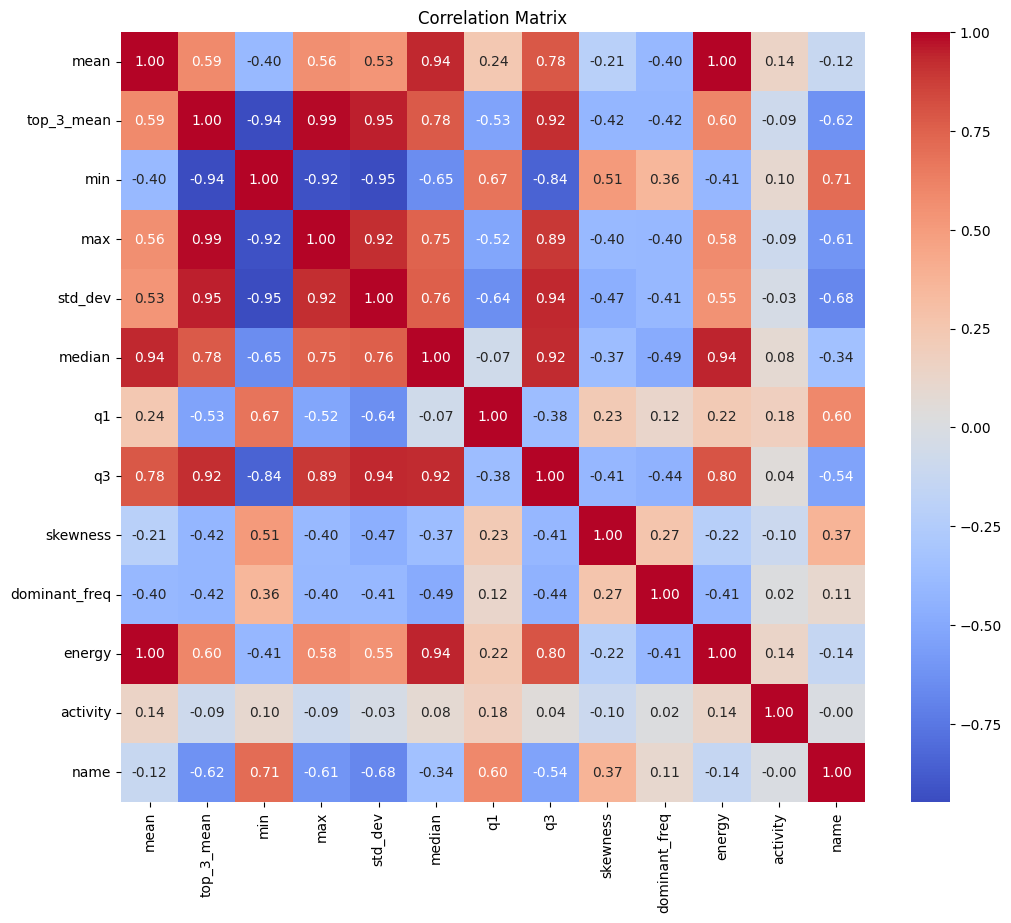

In [18]:
encoder = LabelEncoder()

df['activity'] = encoder.fit_transform(df['activity'])
df['name'] = encoder.fit_transform(df['name'])
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Comparison of classification model performance</div>

In [19]:
X = df.drop(['activity','name','timestamp'], axis=1)
y = df['activity']  

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


models = {
    "Logistic Regression": LogisticRegression(max_iter=10000, random_state=42),
    "SVM": SVC(kernel='rbf', C=1.0, probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, random_state=42),
    "MLP Classifier": MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42),
}

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)  
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    return accuracy, precision, recall, f1

In [21]:
results = []

for name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })

results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.647222,0.652075,0.647222,0.638569
1,SVM,0.752778,0.778720,0.752778,0.750406
2,KNN,0.800000,0.801761,0.800000,0.799310
3,Decision Tree,0.813889,0.817408,0.813889,0.814367
4,Random Forest,0.869444,0.870564,0.869444,0.869381
5,XGBoost,0.855556,0.855685,0.855556,0.855537
6,MLP Classifier,0.841667,0.841533,0.841667,0.841471



Best Model:
Model        Random Forest
Accuracy          0.869444
Precision         0.870564
Recall            0.869444
F1-Score          0.869381
Name: 4, dtype: object


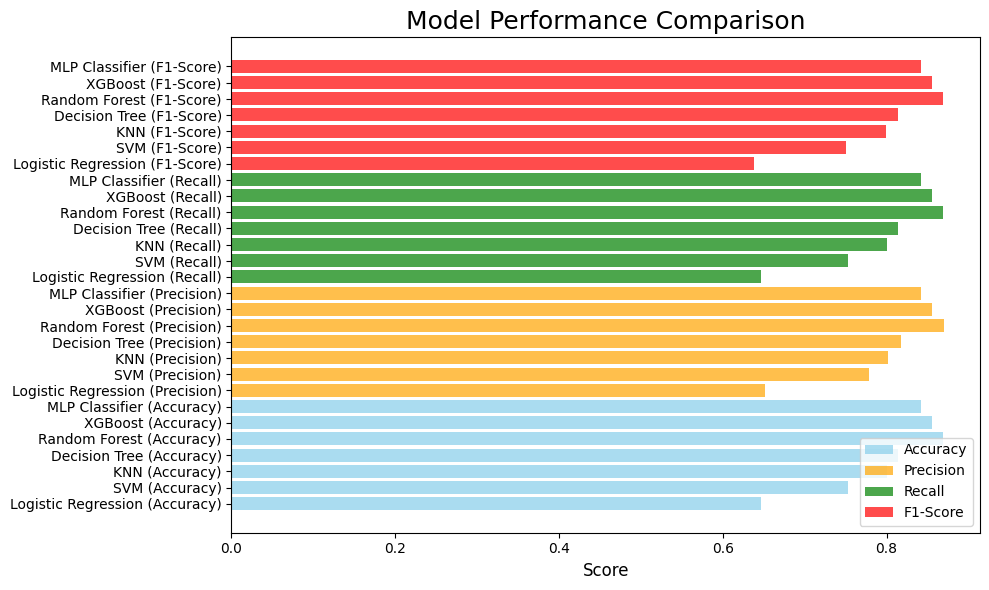


Optimal Model based on Accuracy: Random Forest with Accuracy = 0.8694


In [22]:
best_model = results_df.loc[results_df['Accuracy'].idxmax()]
print("\nBest Model:")
print(best_model)

metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
colors = ["skyblue", "orange", "green", "red"]

fig, ax = plt.subplots(figsize=(10, 6))

for i, metric in enumerate(metrics):
    ax.barh(results_df['Model'] + f" ({metric})", results_df[metric], color=colors[i], alpha=0.7, label=metric)

ax.set_xlabel("Score", fontsize=12)
ax.set_title("Model Performance Comparison", fontsize=18)
ax.legend()
plt.tight_layout()
plt.show()

print(f"\nOptimal Model based on Accuracy: {best_model['Model']} with Accuracy = {best_model['Accuracy']:.4f}")
